# Requiared Library

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import math

# Algorithm Flow
1. Convert Image To black and white image
2. Detect a Group of White pixels
3. Crop the image based on Region Of Interest that created from step 2
4. Template Matching image to group the image based on numbers and words
5. Train and create CNN model using the dataset from step 4
6. Use the CNN model to read words and number on the plate

# Pre-Processing Image (Experiment)

(235, 630, 3)
126 47


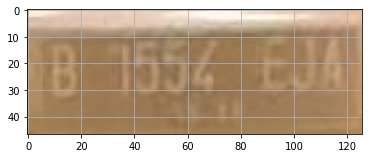

In [115]:
img = cv2.imread("assets/DataTrain/DataTrain10.png")
 
# * Resizing The Image to 600x600 pixel
resize = cv2.resize(img,[len(img[0]) * 5, len(img)* 5], interpolation=cv2.INTER_LANCZOS4)
print(resize.shape)

print(len(img[0]), len(img),)
# * Converting color channel order from Blue Green Red to Red Green Blue 
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.grid(True)

# ? enable this code to remove plot ticks
#plt.xticks([]), plt.yticks([])

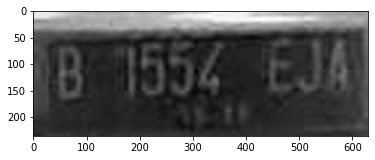

In [116]:

"""
 * Converting 3 Color Channel to 1 Channel of Grayscale
"""
gray_plate = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_plate, cmap="gray")

(<matplotlib.image.AxesImage at 0x2b7524b6d30>, None)

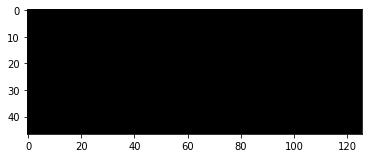

In [117]:
lower_yellow = np.array([0, 100, 100])
upper_yellow = np.array([50, 255, 255])
yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

plt.imshow(yellow_mask, cmap='binary_r'), plt.grid(False)

(<matplotlib.image.AxesImage at 0x2b74629cdc0>, None)

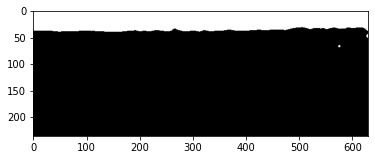

In [118]:


#thresh = ''
if cv2.countNonZero(yellow_mask) > 195:
    """
    * Converting Grayscale image to Black and White image using Thresh otsu technique
    """
    ret, thresh = cv2.threshold(gray_plate,100,255, cv2.THRESH_BINARY )

    # adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 2)
else:
    ret, thresh = cv2.threshold(gray_plate,0,255, cv2.THRESH_OTSU)
    # adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 2)

plt.imshow(thresh, cmap='binary_r'), plt.grid(False)

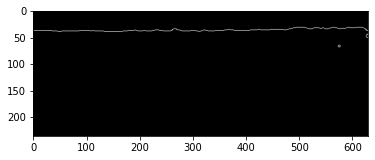

In [119]:
canny = cannyEdges = cv2.Canny(thresh, 0, 100)
plt.imshow(canny, cmap='binary_r')

591


(<matplotlib.image.AxesImage at 0x2b74ef088b0>, None)

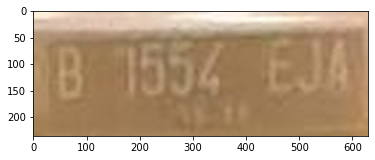

In [125]:

"""
    TODO : Still need more adjustment for detecting white Region

    * finContours() : A method to detect a group of white pixels in thresholded image
    - cv2.RETR_EXTERNAL : To prevent detecting child contours that can create rekursif contours 
    - cv2.CHAIN_APPROX_SIMPLE : one of contours finding technique that use approximation method

    * boundingRect() : A method to get x and y Axis and height and width of the ROI
    * rectangle() : A method to draw the ROI border
"""

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
detected_plate = resize.copy()

width = []
height = []

for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    if h < w:
        width.append(w)
        height.append(h)

print(max(np.array(width)-np.array(height)))

width = sorted(width)
height = sorted(height)


for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    # if h > w and np.mean(height) < h and h < np.mean(height)*2:
    if h < w and w - h == max(np.array(width)-np.array(height)) and h - w > 50:
        print(f"image {i} = [x : {x}, y : {y}, w : {w}, h : {h}, different of w and h : {h-w}]")
        cv2.rectangle(detected_plate,(x,y),(x+w,y+h),(0,0,255), 5)
        detected_plate = detected_plate[y+10:y+h-10, x+10:x+w-10]

# print(f'mean \nw:{width[int(len(width)/2)]} \nh:{height[int(len(width)/2)]}')
im_rgb = cv2.cvtColor(detected_plate, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb), plt.grid(False)

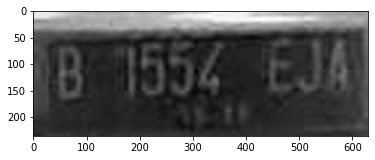

In [126]:
# histogram
gray_char = cv2.cvtColor(detected_plate, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_char,cmap='gray')

578.3203


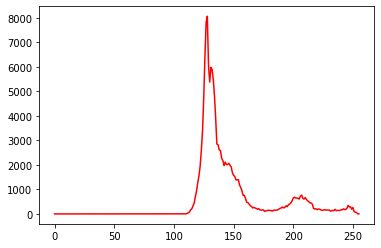

In [127]:
hist = cv2.calcHist([gray_char], channels=[0],mask=None, histSize=[256],ranges= [0, 256])

plt.plot(hist, color = 'r')
print(np.mean(hist))

8


(<matplotlib.image.AxesImage at 0x2b76217fb20>, None)

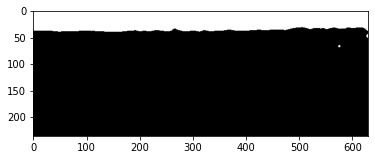

In [128]:
white_mask = cv2.inRange(gray_char, 128, 256)
if cv2.countNonZero(yellow_mask) > 195:
    """
    * Converting Grayscale image to Black and White image using Thresh otsu technique
    """
    ret, thresh_char = cv2.threshold(gray_char,97,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    

    # adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 2)
else:
    ret, thresh_char = cv2.threshold(gray_char,0,255, cv2.THRESH_OTSU)
    # adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 2)
print(cv2.THRESH_OTSU)
plt.imshow(thresh_char, cmap='binary_r'), plt.grid(False)

[4] 4.0


(<matplotlib.image.AxesImage at 0x2b7621e6fd0>, None)

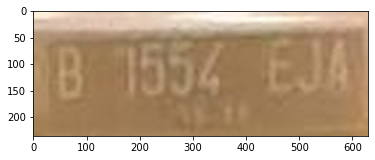

In [129]:
"""
    TODO : Still need more adjustment for detecting white Region

    * finContours() : A method to detect a group of white pixels in thresholded image
    - cv2.RETR_EXTERNAL : To prevent detecting child contours that can create rekursif contours 
    - cv2.CHAIN_APPROX_SIMPLE : one of contours finding technique that use approximation method

    * boundingRect() : A method to get x and y Axis and height and width of the ROI
    * rectangle() : A method to draw the ROI border
"""

contours2, _ = cv2.findContours(thresh_char, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
detected_char = detected_plate.copy()

rect_area = []


for i in range(len(contours2)):
    x,y,w,h=cv2.boundingRect(contours2[i])
    if h > w:
        rect_area.append(h-w)



rect_area = sorted(rect_area)
print(rect_area,np.mean(rect_area))

for i in range(len(contours2)):
    x,y,w,h=cv2.boundingRect(contours2[i])
    # if h > w and np.mean(height) < h and h < np.mean(height)*2:
    if h > w and np.mean(rect_area) < h - w:
        print(f"image {i} = [x : {x}, y : {y}, w : {w}, h : {h}, different of w and h : {h-w}]")
        cv2.rectangle(detected_char,(x,y),(x+w,y+h),(0,0,255), 10)

# print(f'mean \nw:{width[int(len(width)/2)]} \nh:{height[int(len(width)/2)]}')
im_rgb2 = cv2.cvtColor(detected_char, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb2), plt.grid(False)

# Main Algorithm

In [10]:

def preprocessing(img):
    # * Resizing The Image to 600x600 pixel
    # resize = cv2.resize(img,[600,600])
    resize = cv2.resize(img,[1000,500], interpolation=cv2.INTER_LANCZOS4)
    gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    

    lower_yellow = np.array([0, 100, 100])
    upper_yellow = np.array([50, 255, 255])
    yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

    if cv2.countNonZero(yellow_mask) > 195:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    else:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i])
        if h > w and np.mean(height) < h and h < np.mean(height)*2:
            cv2.rectangle(resize,(x,y),(x+w,y+h),(0,0,255), 2)
    
    return resize

def preprocessing2(img):
    # * Resizing The Image to 600x600 pixel
    # resize = cv2.resize(img,[600,600])
    resize = cv2.resize(img,[1000,500], interpolation=cv2.INTER_LANCZOS4)
    gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    


    lower_yellow = np.array([0, 100, 100])
    upper_yellow = np.array([50, 255, 255])
    yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

    if cv2.countNonZero(yellow_mask) > 195:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    else:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    width = []
    height = []
    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i])
        if h > w:
            width.append(w)
            height.append(h)
        cropped = []
    
    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i])
        if  h > w and np.mean(height) < h and h < np.mean(height)*2 and len(img) > 100:
            cropped.append(thresh[y:y+h, x:x+w])
    
    return cropped

In [11]:
directory = "assets/DataTrain/"
listOfImages = os.listdir(directory)
len(listOfImages)

collections = []
for i in range(1,len(listOfImages)):
    img = cv2.imread(f"assets/DataTrain/DataTrain{i}.png")
    collections.append(preprocessing(img))



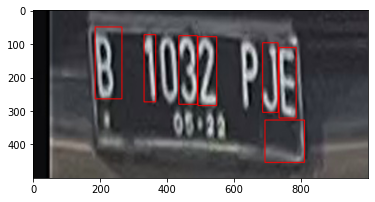

In [12]:
view =  cv2.cvtColor(collections[11], cv2.COLOR_BGR2RGB)
plt.imshow(view)

In [13]:
c_collections = []
for i in range(1,len(listOfImages)):
    img = cv2.imread(f"assets/DataTrain/DataTrain{i}.png")
    numChar = preprocessing2(img)
    # c_collections.append(numChar)
    for j in numChar:
        print(j)
        c_collections.append(j)


[[  0   0   0   0   0 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255 255 255   0   0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255 255 255 255]
 [  0 255 255 255 255 255 255 255 255 255 255 255]
 [  0   0   0 255 255 255 255 255 255 255 255   0]]
[[  0   0 255   0   0   0]
 [  0 255 255 255   0   0]
 [255 255 255 255 255   0]
 [255 255 255 255 255 255]
 [255 255 255 255 255 255]
 [255 255 255 255 255 255]
 [  0 255 255 255 255 255]
 [  0 255 255 255 255   0]
 [  0 255 255 255 255   0]
 [  0 255 255 255 255 255]
 [255 255 255 2

In [14]:
# ! this code for analysis purpose 

view2 = cv2.cvtColor(c_collections[1], cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(view2,0,255,cv2.THRESH_BINARY_INV +  cv2.THRESH_OTSU)
plt.imshow(threshed, cmap ="binary_r")

error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<1,-1,-1>,struct cv::impl::A0xa96199bf::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


1783


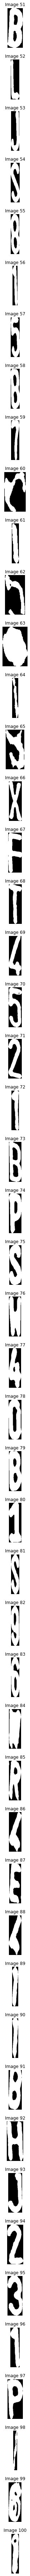

In [ ]:

fig, axes = plt.subplots(nrows=50, ncols=1, figsize=(60, 100))
fig.subplots_adjust(left=0.1, bottom=1, right=1, top=2, wspace=0.5, hspace=0.3)

print(len(c_collections))

for i in range(50,100):
    # Plot the image
    # gray_conv = cv2.cvtColor(c_collections[i], cv2.COLOR_BGR2GRAY)
    # _, threshed = cv2.threshold(gray_conv,0,255, cv2.THRESH_OTSU)
    # canny = cannyEdges = cv2.Canny(threshed, 100, 50)
    axes[-(50-i)].imshow(cv2.cvtColor(c_collections[i], cv2.COLOR_BGR2RGB))
    axes[-(50-i)].axis('off')
    axes[-(50-i)].set_title(f'Image {i+1}')

# Adjust subplot layout
#plt.tight_layout()

# Show the plot
plt.show()

# Pretrained Model

In [ ]:
# # Tensoflow library
# import tensorflow as tf

In [ ]:
# digits = tf.keras.datasets.mnist

# (xtrain, ytrain), (xtest, ytest) = digits.load_data()
# len(ytrain)



60000

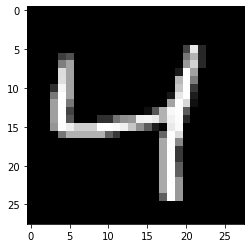

In [ ]:
# plt.imshow(xtrain[2], cmap ='binary_r')


60000

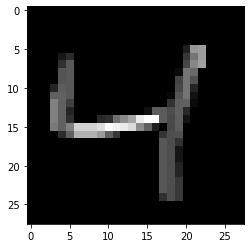

In [ ]:
# import tensorflow as tf
# # Normalize -> range the pixel between 0 to 1

# xtrain = tf.keras.utils.normalize(xtrain, axis = 1)
# xtest = tf.keras.utils.normalize(xtest, axis=1)
# plt.imshow(xtrain[2], cmap="binary_r")


# len(ytrain)


In [ ]:


# #buildinf CNN model

# model = tf.keras.models.Sequential()

# #converto to 1 dimension
# model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# model.compile(optimizer = 'adam',
#             loss ='sparse_categorical_crossentropy',
#             metrics =['accuracy'])

# model.fit(xtrain,ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2639 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0735 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0555 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0250 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0216 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0158 - accuracy: 0.9946: 0s - loss: 0.015
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/

In [ ]:
# model.save('digits_model')

INFO:tensorflow:Assets written to: digits_model\assets


In [ ]:

# use_model = tf.keras.models.load_model('digits_model')

In [ ]:
# resized = cv2.resize(c_collections[16],[28,28]).reshape(1,784)
# xtest = tf.keras.utils.normalize(resized, axis=1)

# predict = use_model.predict([resized])
# print(np.argmax(predict[0]))

2


(784,)


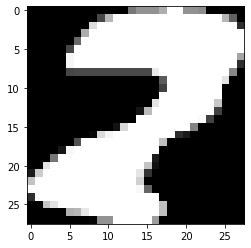

In [ ]:
# plt.imshow(cv2.resize(c_collections[16],[28,28]), cmap ="binary_r")
# print(np.shape(xtest[0]))

(28, 28)


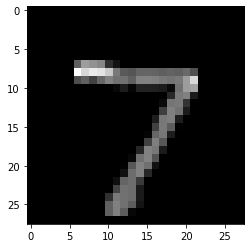

In [ ]:
# plt.imshow(cv2.resize(xtest[0],[28,28]), cmap ="binary_r")
# print(np.shape(xtest[0]))

In [ ]:
# result = cv2.matchTemplate(image_to_compare, template_image, cv2.TM_CCOEFF_NORMED)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)


In [76]:

for i in range(len(c_collections)):
    resize = cv2.resize(c_collections[i],[100,200])
    c_collections[i] = resize




1783


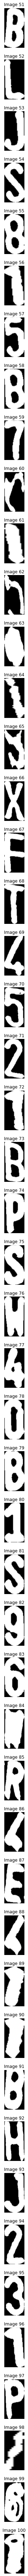

In [77]:
fig, axes = plt.subplots(nrows=50, ncols=1, figsize=(60, 100))
fig.subplots_adjust(left=0.1, bottom=1, right=1, top=2, wspace=0.5, hspace=0.3)

print(len(c_collections))

for i in range(50,100):
    # Plot the image
    # gray_conv = cv2.cvtColor(c_collections[i], cv2.COLOR_BGR2GRAY)
    # _, threshed = cv2.threshold(gray_conv,0,255, cv2.THRESH_OTSU)
    # canny = cannyEdges = cv2.Canny(threshed, 100, 50)
    axes[-(50-i)].imshow(cv2.cvtColor(c_collections[i], cv2.COLOR_BGR2RGB))
    axes[-(50-i)].axis('off')
    axes[-(50-i)].set_title(f'Image {i+1}')

# Adjust subplot layout
#plt.tight_layout()

# Show the plot
plt.show()

In [78]:
grouped = []
i = 0
grouped.append([c_collections[0]])
for compare_1 in c_collections:
    check = True
    print(f'{i} out of {len(c_collections)}')
    i+=1
    for compare_2 in grouped:
        result = cv2.matchTemplate(compare_1, compare_2[0], cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        if max_val > 0.725:
            compare_2.append(compare_1)
            check = False
            break
    if check:
        grouped.append([compare_1])

0 out of 1783
1 out of 1783
2 out of 1783
3 out of 1783
4 out of 1783
5 out of 1783
6 out of 1783
7 out of 1783
8 out of 1783
9 out of 1783
10 out of 1783
11 out of 1783
12 out of 1783
13 out of 1783
14 out of 1783
15 out of 1783
16 out of 1783
17 out of 1783
18 out of 1783
19 out of 1783
20 out of 1783
21 out of 1783
22 out of 1783
23 out of 1783
24 out of 1783
25 out of 1783
26 out of 1783
27 out of 1783
28 out of 1783
29 out of 1783
30 out of 1783
31 out of 1783
32 out of 1783
33 out of 1783
34 out of 1783
35 out of 1783
36 out of 1783
37 out of 1783
38 out of 1783
39 out of 1783
40 out of 1783
41 out of 1783
42 out of 1783
43 out of 1783
44 out of 1783
45 out of 1783
46 out of 1783
47 out of 1783
48 out of 1783
49 out of 1783
50 out of 1783
51 out of 1783
52 out of 1783
53 out of 1783
54 out of 1783
55 out of 1783
56 out of 1783
57 out of 1783
58 out of 1783
59 out of 1783
60 out of 1783
61 out of 1783
62 out of 1783
63 out of 1783
64 out of 1783
65 out of 1783
66 out of 1783
67 ou

362


IndexError: list index out of range

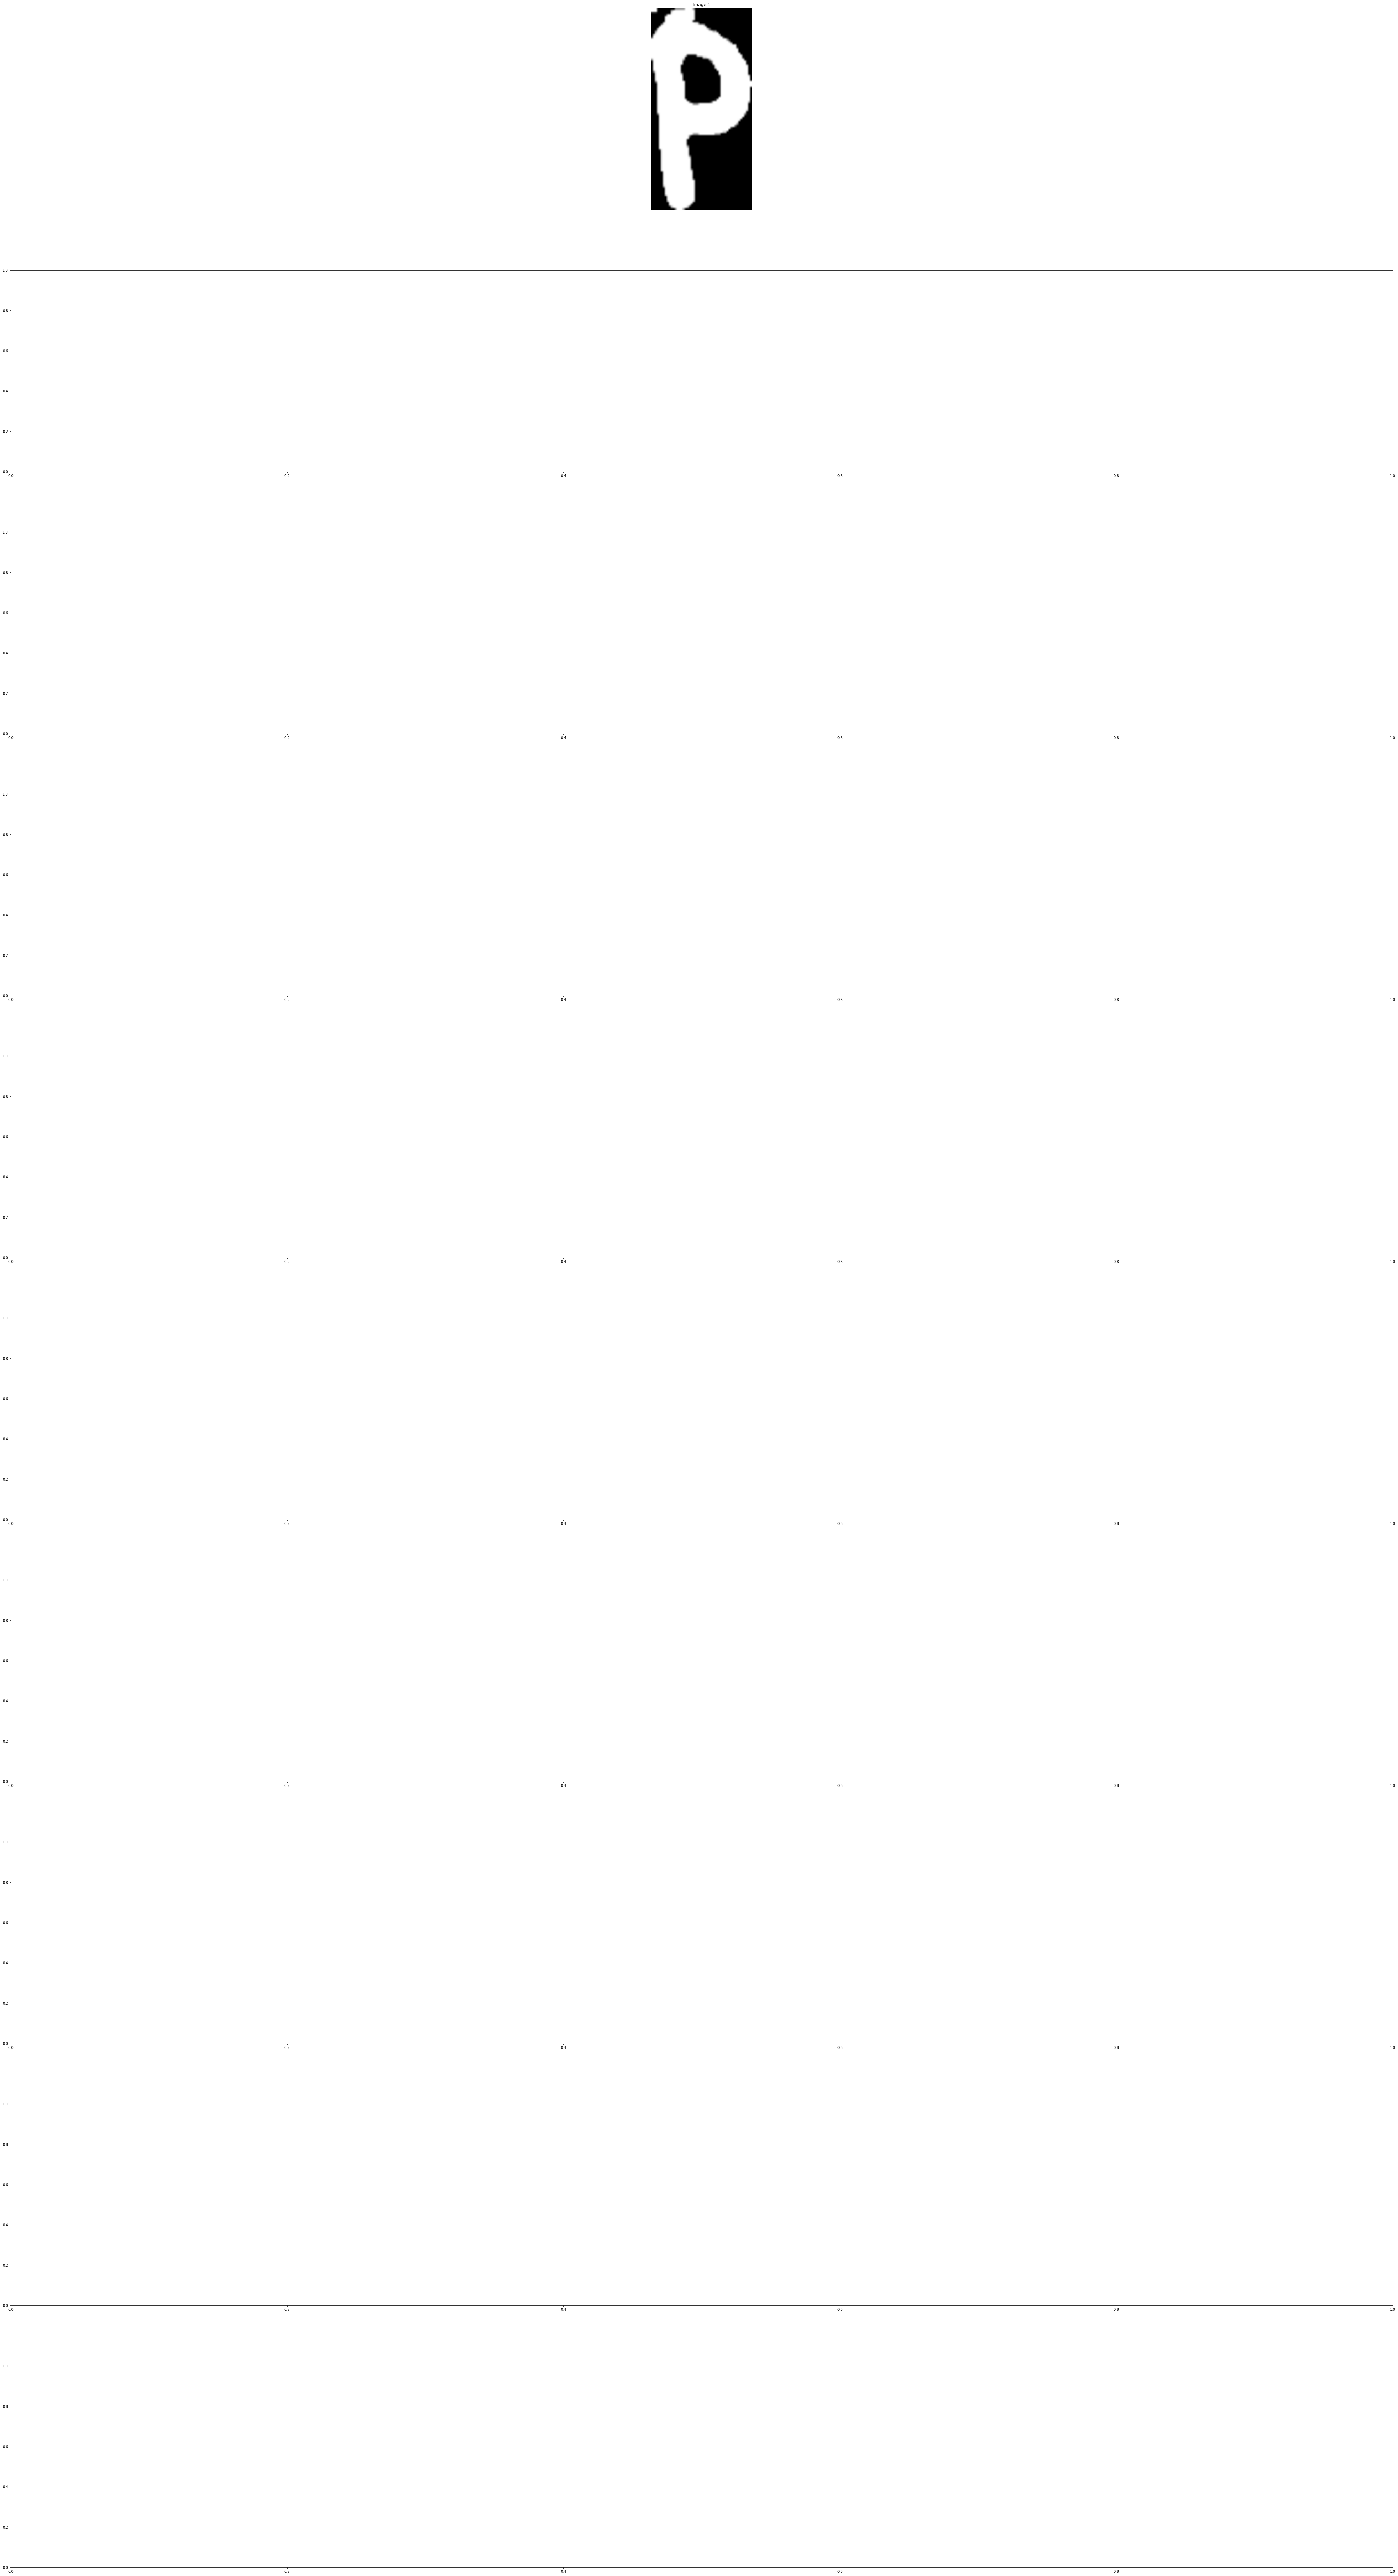

In [79]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(60, 100))
fig.subplots_adjust(left=0.1, bottom=1, right=1, top=2, wspace=0.5, hspace=0.3)

print(len(grouped))
x = 1
for i in range(0,10):

    # Plot the image
    # gray_conv = cv2.cvtColor(c_collections[i], cv2.COLOR_BGR2GRAY)
    # _, threshed = cv2.threshold(gray_conv,0,255, cv2.THRESH_OTSU)
    # canny = cannyEdges = cv2.Canny(threshed, 100, 50)
    axes[i].imshow(cv2.cvtColor(grouped[28][i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Image {i+1}')
    x+=1

# Adjust subplot layout
#plt.tight_layout()

# Show the plot
plt.show()

In [80]:
path = 'group'
if not os.path.exists(path): 
    os.makedirs(path)
x = 0
for i in range(len(grouped)):
    for j in grouped[i]:
        if not os.path.exists(path+f'/{i}'): 
            os.makedirs(path+f'/{i}')
        cv2.imwrite(f'{path}/{i}/image{x}.jpg',j)
        x+=1
            
            


# Labeling

In [91]:
X_train = []
Y_train = []
path = 'group'
listOfDir = os.listdir(path)
x = 0
for folder in listOfDir:
    listOfImages = os.listdir(f'{path}/{folder}')
    itr = 0
    for image in listOfImages:
        # if itr == 5:
        #     break
        img = cv2.imread(f"{path}/{folder}/{image}")
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray_img,[50,50])
        X_train.append(resize)
        Y_train.append(x)
        itr += 1
    x += 1


In [92]:
print(np.shape(X_train),X_train)

(5641, 50, 50) [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,


In [93]:
print(Y_train, len(Y_train))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Training Using CNN

In [83]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Inisialisasi model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(50,50,1) ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






In [65]:
np.shape(X_train[-1])

(200, 100)

In [95]:
norm_X_train = tf.keras.utils.normalize(X_train, axis = 1)

In [97]:
model.fit(np.array(X_train),np.array(Y_train),epochs=20, batch_size=3)

Epoch 1/20
1881/1881 [==============================] - 28s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 2/20
1881/1881 [==============================] - 27s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 3/20
1881/1881 [==============================] - 25s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 4/20
1881/1881 [==============================] - 24s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 5/20
1881/1881 [==============================] - 24s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 6/20
1881/1881 [==============================] - 30s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 7/20
1881/1881 [==============================] - 29s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 8/20
1881/1881 [==============================] - 23s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 9/20
1881/1881 [==============================] - 23s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0417
Epoch 10/20
1881/1881 [=====